## answer 1


In [3]:
import pandas as pd

indicator_data = [
    {"Indicator Name": "Relative Strength Index", "Date Range": "2014-03-01 to 2018-12-01"},
    {"Indicator Name": "EMA", "Date Range": "2008-01-20 to 2010-10-20"},
    {"Indicator Name": "MACD", "Date Range": "2019-04-05 to 2021-11-30"},
    {"Indicator Name": "SMA", "Date Range": "2011-02-01 to 2015-09-25"},
    {"Indicator Name": "Donchian Channel", "Date Range": "2019-05-15 to 2021-12-10"}
]



In [4]:
lasttwodigits = 56


quotient = lasttwodigits
while quotient >= 5:
    quotient = quotient // 5

remainder = lasttwodigits % 5

row1 = quotient
row2 = row1 - 1 if row1 != 0 else row1 + 1

In [6]:
indicator1 = indicator_data[row1]["Indicator Name"]
date_range1 = indicator_data[row1]["Date Range"]

indicator2 = indicator_data[row2]["Indicator Name"]
date_range2 = indicator_data[row2]["Date Range"]


print(f"First Indicator: {indicator1}")
print(f"Date Range: {date_range1}")
print(f"\nSecond Indicator: {indicator2}")
print(f"Date Range: {date_range2}")

First Indicator: MACD
Date Range: 2019-04-05 to 2021-11-30

Second Indicator: EMA
Date Range: 2008-01-20 to 2010-10-20


## answer 2


In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


ticker = "^BSESN"
start_date = "2021-01-01"
end_date = "2024-01-31"
data = yf.download(ticker, start=start_date, end=end_date)


def calculate_bollinger_bands(data, window=20):
    data['Middle Band'] = data['Close'].rolling(window=window).mean()
    data['Upper Band'] = data['Middle Band'] + 2 * data['Close'].rolling(window=window).std()
    data['Lower Band'] = data['Middle Band'] - 2 * data['Close'].rolling(window=window).std()


def generate_signals(data):
    signals = np.zeros(len(data))
    position = 0  

    for i in range(1, len(data)):
        if data['Close'][i] > data['Upper Band'][i-1] and position != -1:
            signals[i] = -1
            position = -1  
        elif data['Close'][i] < data['Lower Band'][i-1] and position != 1:
            signals[i] = 1
            position = 1  
        else:
            signals[i] = 0

    return signals




[*********************100%%**********************]  1 of 1 completed


In [14]:
def backtest_strategy(data, signals, initial_capital=2000000):
    positions = pd.DataFrame(index=data.index).fillna(0.0)
    positions['Position'] = signals
    portfolio = pd.DataFrame(index=data.index)
    portfolio['Cash'] = initial_capital - (positions['Position'] * data['Close']).cumsum()
    portfolio['Holdings'] = positions['Position'] * data['Close']
    portfolio['Total'] = portfolio['Cash'] + portfolio['Holdings']
    portfolio['Returns'] = portfolio['Total'].pct_change()
    return portfolio

calculate_bollinger_bands(data)
signals = generate_signals(data)
portfolio = backtest_strategy(data, signals)

In [15]:
print(portfolio.tail())

                    Cash      Holdings         Total   Returns
Date                                                          
2024-01-23  1.992329e+06  70370.546875  2.062699e+06  0.000000
2024-01-24  1.992329e+06      0.000000  1.992329e+06 -0.034116
2024-01-25  1.992329e+06      0.000000  1.992329e+06  0.000000
2024-01-29  1.992329e+06      0.000000  1.992329e+06  0.000000
2024-01-30  1.992329e+06      0.000000  1.992329e+06  0.000000


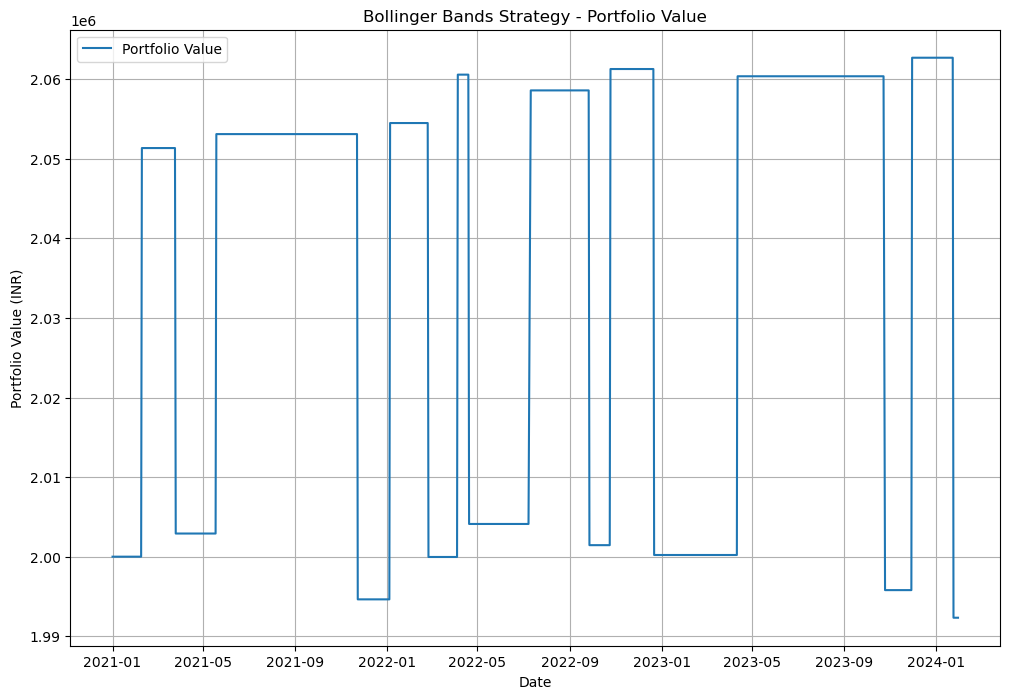

In [16]:
plt.figure(figsize=(12,8))
plt.plot(portfolio['Total'], label='Portfolio Value')
plt.legend()
plt.title('Bollinger Bands Strategy - Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.grid(True)
plt.show()

In [17]:
daily_returns = portfolio['Returns']
sharpe_ratio = np.sqrt(252) * (daily_returns.mean() / daily_returns.std())
print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 0.014197782792019548
